In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to get Train Accuracy, Cross Validation Accuracy & KNN plot for different values of K

Comparing decision boundary for different value of k

fn = knn_comparison(data, k)

In [56]:
#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
    x = data[['X','Y']].values # independent features
    y = data['class'].astype(int).values # y -> target/true labels 
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=7)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
    knn.fit(x_train, y_train) # train the model
    print("K : ",k)
    print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
    print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    
    # Plotting decision region
    plot_decision_regions(x_train, y_train, clf = knn, legend=2) # it plots the decision boundary
    ##Adding axes annotations
    plt.xlabel('X') #Names the x-axis
    plt.ylabel('Y') #Names the y-axis
    plt.title('Knn with K='+ str(k)) #Names the graph
    plt.show() #Displays the graph 

# Function to get Train Accuracy, Val Accuracy & Logisitic Regression plot for different values of K without Scaling and splitting

logistic(data, k = 0)

In [57]:
#Same as above, but with logreg
def logistic(data, k = 0):
    x = data[['X','Y']].values
    y = data['class'].astype(int).values
    clf = LogisticRegression()
    clf.fit(x, y)
    print("K : ",k)
    print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
    print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Logistic Regression decision boundary')
    plt.show()

# KNN Algorithm

# U Shaped Dataset

In [58]:
data1 = pd.read_csv('ushape.csv')
data1

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0
...,...,...,...
95,1.7000,0.5880,1.0
96,0.2190,-0.6530,1.0
97,0.9530,-0.4200,1.0
98,-1.3200,0.4230,0.0


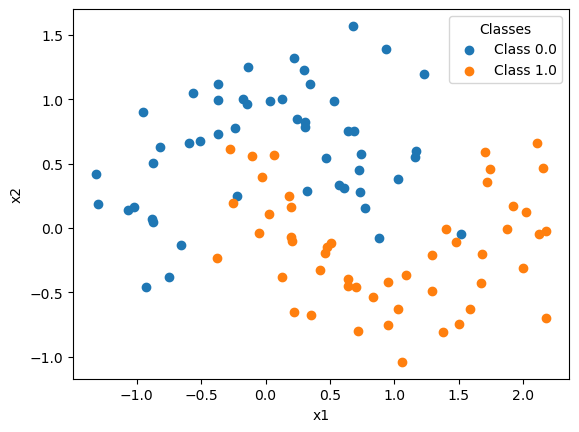

In [59]:
classes = data1['class'].unique()

for c in classes:
    class_data = data1[data1['class'] == c]
    plt.scatter(class_data['X'], class_data['Y'], label='Class ' + str(c))

plt.legend(title='Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Here, the dataset is such that we cant apply logistic regression since it does not have a linear decision boundary

In [60]:
# Separating features & target and splitting them as training & testing dataset
X = data1[['X','Y']].values
y = data1['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

# Scaling train and test dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
# Calculating train and cv score on different K values
k=[]
train_score=[]
cv_score=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    train_score.append(knn.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

From the table displayed below, we can infer the best value of K for KNN algorithm.The best K value avoids both underfitting and overfitting.

In [67]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.942857
1,2,0.971429,0.942857
2,3,0.985714,0.928571
3,4,0.971429,0.957143
4,5,0.985714,0.971429
5,6,0.985714,0.928571
6,7,0.985714,0.942857
7,8,0.942857,0.928571
8,9,0.942857,0.928571
9,10,0.942857,0.914286


**k = 5** is the best value of k. Found using Hyper-Parameter Tuning

### From the below plots, we are comparing how the decision boundary changes as the k value increments

In [9]:
for i in [1,2,3,4,5,6,7,8,9]: #hit n trial
    knn_comparison(data1,i)

Decision boundary tends to overfit when k is less. As K increments, decision boundary keeps more generalizing till it reaches an optimum point at which the model works best. If we further increment K, it will lead to underfit. 

In [10]:
# Calculating train and cv score on different K values
k=[]
test_score=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    test_score.append(knn.score(x_test,y_test))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Test_Score':test_score}
score = pd.DataFrame(score)

In [11]:
score

,K,Test_Score
0,1,0.900000
1,2,0.866667
2,3,0.900000
3,4,0.866667
4,5,0.900000
5,6,0.866667
6,7,0.900000
7,8,0.900000
8,9,0.900000
9,10,0.900000


From the Test Score table, it is evident that we have selected the best value of K correctly since it gives the highest test score

Optimum Model Accuracy = 90% ;  
Best K value = 5

### Let's try predicting class with random sample input

In [68]:
dat = pd.read_csv('ushape.csv')
X = dat[['X','Y']].values
y = dat['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

# Scaling train and test dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

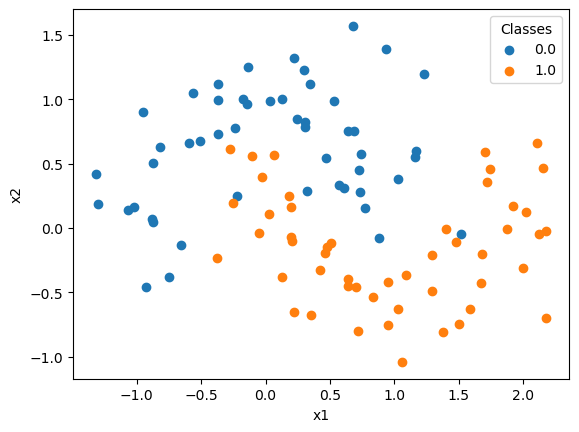

In [69]:
classes = dat['class'].unique()

for c in classes:
    class_data = dat[dat['class'] == c]
    plt.scatter(class_data['X'], class_data['Y'], label= str(c))

plt.legend(title='Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [70]:
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X1,X2(0.5,1):', knn.predict(scaler.transform([[0.5,1]])))

PREDICTING KNN SCORE OF X1,X2(0.5,1): [0.]


We could compare our result with the plot above

### Comparing CV scores with n fold cross validation where n=5,10

In [71]:
# Calculating train and cv score on different K values
k=[]
train_score=[]
cv_score_5=[]
cv_score_10=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    train_score.append(knn.score(x_train,y_train))
    cv_score_5.append(np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
    cv_score_10.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Train_Score':train_score,'CV_Score (n=5)':cv_score_5,'CV_Score (n=10)':cv_score_10}
score = pd.DataFrame(score)

In [72]:
score

,K,Train_Score,CV_Score (n=5),CV_Score (n=10)
0,1,1.000000,0.928571,0.942857
1,2,0.971429,0.942857,0.942857
2,3,0.985714,0.928571,0.928571
3,4,0.971429,0.942857,0.957143
4,5,0.985714,0.942857,0.971429
5,6,0.985714,0.928571,0.928571
6,7,0.985714,0.942857,0.942857
7,8,0.942857,0.928571,0.928571
8,9,0.942857,0.928571,0.928571
9,10,0.942857,0.928571,0.914286


# Concentric Circles Dataset

In [75]:
data2 = pd.read_csv('concertriccir2.csv')
data2

,X,Y,class
0,0.700,-0.247,0.0
1,-3.950,2.740,1.0
2,0.150,-2.160,1.0
3,-1.670,-0.942,1.0
4,2.560,-1.850,1.0
...,...,...,...
495,2.180,2.980,1.0
496,1.780,2.870,1.0
497,0.894,3.070,0.0
498,0.849,3.880,0.0


<Axes: xlabel='X', ylabel='Y'>

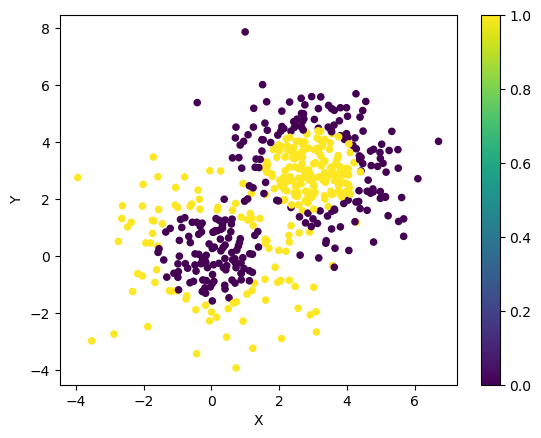

In [76]:
data2.plot(x='X', y='Y', c=data2['class'], kind='scatter', colormap='viridis')

In [77]:
# Separating features & target and splitting them as training & testing dataset
X = data2[['X','Y']].values
y = data2['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [96]:
k=[]
train_score=[]
cv_score=[]

# Calculating train and cv score on different K values
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn2 = KNeighborsClassifier(i) #initialising the model
    knn2.fit(x_train,y_train) # training the model
    #print("K value  : " , i, " train score : ", knn2.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn2, x_train, y_train, cv=10))) #predicting using the model
    k.append(i)
    train_score.append(knn2.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn2, x_train, y_train, cv=5)))
    
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

In [97]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.894286
1,2,0.960000,0.874286
2,3,0.951429,0.897143
3,4,0.934286,0.868571
4,5,0.948571,0.888571
5,6,0.940000,0.880000
6,7,0.937143,0.882857
7,8,0.925714,0.862857
8,9,0.917143,0.871429
9,10,0.905714,0.857143


k = 3 is the best value of k - hyperparameter tuning

### From the below plots, we are comparing how the decision boundary changes as the k value increments

In [22]:
for i in [1,3,5,6,8,10,20,30,40,80]:
    knn_comparison(data2, i)

In [98]:
# Calculating train and cv score on different K values
k=[]
test_score=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    test_score.append(knn.score(x_test,y_test))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Test_Score':test_score}
score = pd.DataFrame(score)

In [99]:
score

,K,Test_Score
0,1,0.860000
1,2,0.873333
2,3,0.886667
3,4,0.873333
4,5,0.873333
5,6,0.880000
6,7,0.840000
7,8,0.860000
8,9,0.840000
9,10,0.840000


From the Test Score table, it is evident that we have selected the best value of K correctly since it gives the highest test score

Optimum Model Accuracy = 88.67% ;
Best K value = 3

Let's try predicting class with random sample input

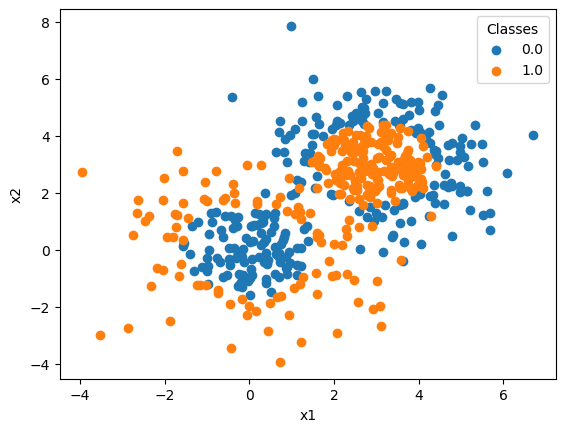

In [100]:
classes = data2['class'].unique()

for c in classes:
    class_data = data2[data2['class'] == c]
    plt.scatter(class_data['X'], class_data['Y'], label= str(c))

plt.legend(title='Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [26]:
knn2 = KNeighborsClassifier()
knn2.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X,Y(0,-4):', knn2.predict(scaler.transform([[0,-4]])))

PREDICTING KNN SCORE OF X,Y(0,-4): [1.]


We could compare our result with the plot above


### Comparing CV scores with n fold cross validation where n=5,10

In [27]:
# Calculating train and cv score on different K values
k=[]
train_score=[]
cv_score_5=[]
cv_score_10=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    train_score.append(knn.score(x_train,y_train))
    cv_score_5.append(np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
    cv_score_10.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Train_Score':train_score,'CV_Score (n=5)':cv_score_5,'CV_Score (n=10)':cv_score_10}
score = pd.DataFrame(score)

In [28]:
score

,K,Train_Score,CV_Score (n=5),CV_Score (n=10)
0,1,1.000000,0.894286,0.905714
1,2,0.960000,0.874286,0.882857
2,3,0.951429,0.897143,0.900000
3,4,0.934286,0.868571,0.880000
4,5,0.948571,0.888571,0.885714
5,6,0.940000,0.880000,0.882857
6,7,0.937143,0.882857,0.897143
7,8,0.925714,0.862857,0.888571
8,9,0.917143,0.871429,0.882857
9,10,0.905714,0.857143,0.860000


# XOR Dataset

In [101]:
data3 = pd.read_csv('xor.csv')
data3.columns=['X','Y','class']
data3

,X,Y,class
0,0.978738,2.240893,-1.0
1,1.867558,-0.977278,1.0
2,0.950088,-0.151357,1.0
3,-0.103219,0.410599,1.0
4,0.144044,1.454274,-1.0
...,...,...,...
494,0.441033,0.178793,-1.0
495,-0.799422,0.240788,1.0
496,0.289121,0.412871,-1.0
497,-0.198399,0.094192,1.0


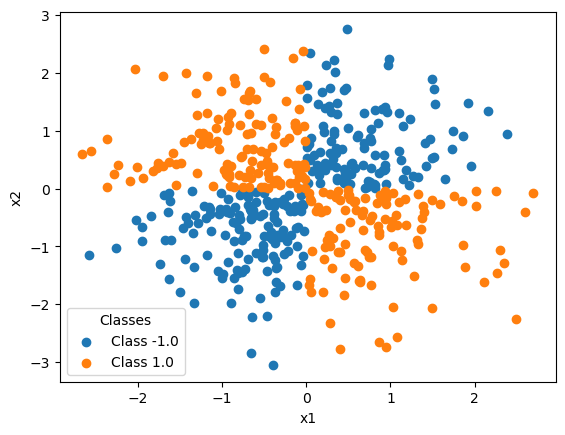

In [102]:
classes = data3['class'].unique()

for c in classes:
    class_data = data3[data3['class'] == c]
    plt.scatter(class_data['X'], class_data['Y'], label='Class ' + str(c))

plt.legend(title='Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [111]:
# Separating features & target and splitting them as training & testing dataset
X = data3[['X','Y']].values
y = data3['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [112]:
k=[]
train_score=[]
cv_score=[]

# Calculating train and cv score on different K values
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn3 = KNeighborsClassifier(i) #initialising the model
    knn3.fit(x_train,y_train) # training the model
    #print("K value  : " , i, " train score : ", knn2.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn2, x_train, y_train, cv=10))) #predicting using the model
    k.append(i)
    train_score.append(knn3.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn3, x_train, y_train, cv=5)))
    
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

In [113]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.942857
1,2,0.974212,0.942733
2,3,0.979943,0.968530
3,4,0.977077,0.954161
4,5,0.977077,0.965631
5,6,0.977077,0.962816
6,7,0.977077,0.965673
7,8,0.979943,0.957101
8,9,0.985673,0.948489
9,10,0.982808,0.945549


**k = 3** is the best value of k. Found using Hyper-Parameter Tuning

### From the below plots, we are comparing how the decision boundary changes as the k value increments

In [34]:
for i in [1,3,5,6,8,10,20,30,80]:
    knn_comparison(data3, i)

In [114]:
# Calculating train and cv score on different K values
k=[]
test_score=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    test_score.append(knn.score(x_test,y_test))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Test_Score':test_score}
score = pd.DataFrame(score)

In [115]:
score

,K,Test_Score
0,1,0.960000
1,2,0.966667
2,3,0.960000
3,4,0.960000
4,5,0.960000
5,6,0.960000
6,7,0.946667
7,8,0.946667
8,9,0.953333
9,10,0.946667


From the Test Score table, it is evident that we have selected the best value of K correctly since it gives the highest test score

Optimum Model Accuracy = 96% ;
Best K value = 3

### Let's try predicting class with random sample input

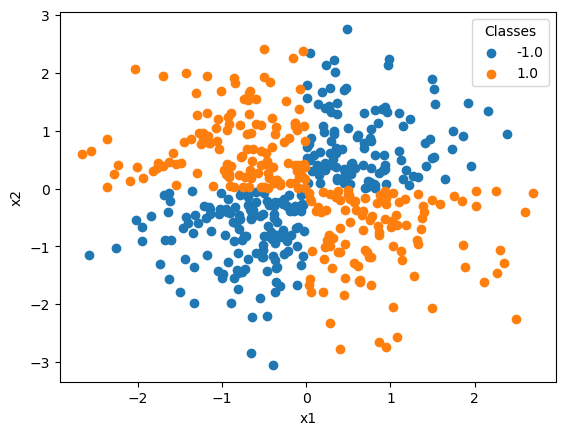

In [37]:
classes = data3['class'].unique()

for c in classes:
    class_data = data3[data3['class'] == c]
    plt.scatter(class_data['X'], class_data['Y'], label= str(c))

plt.legend(title='Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [38]:
knn2 = KNeighborsClassifier(3)
knn2.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X,Y(0,-4):', knn2.predict(scaler.transform([[1,2]])))

PREDICTING KNN SCORE OF X,Y(0,-4): [-1.]


We could compare our result with the plot above

### Comparing CV scores with n fold cross validation where n=5,10

In [39]:
# Calculating train and cv score on different K values
k=[]
train_score=[]
cv_score_5=[]
cv_score_10=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    train_score.append(knn.score(x_train,y_train))
    cv_score_5.append(np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
    cv_score_10.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Train_Score':train_score,'CV_Score (n=5)':cv_score_5,'CV_Score (n=10)':cv_score_10}
score = pd.DataFrame(score)

In [40]:
score

,K,Train_Score,CV_Score (n=5),CV_Score (n=10)
0,1,1.000000,0.942857,0.937143
1,2,0.974212,0.942733,0.942605
2,3,0.979943,0.968530,0.960000
3,4,0.977077,0.954161,0.959832
4,5,0.977077,0.965631,0.959916
5,6,0.977077,0.962816,0.959916
6,7,0.977077,0.965673,0.962857
7,8,0.979943,0.957101,0.962773
8,9,0.985673,0.948489,0.957143
9,10,0.982808,0.945549,0.948403


# Linearly Separable Dataset

In [134]:
data4 = pd.read_csv('linearsep.csv')
data4.columns=['X','Y','class']
data4

,X,Y,class
0,1.977424,1.766155,0.0
1,1.800024,1.700343,0.0
2,-0.770837,2.359163,1.0
3,-0.308009,1.594063,1.0
4,0.614721,2.434898,1.0
...,...,...,...
94,2.632382,1.271305,0.0
95,-0.040256,1.782708,1.0
96,-0.787453,1.400357,1.0
97,2.702441,1.587444,0.0


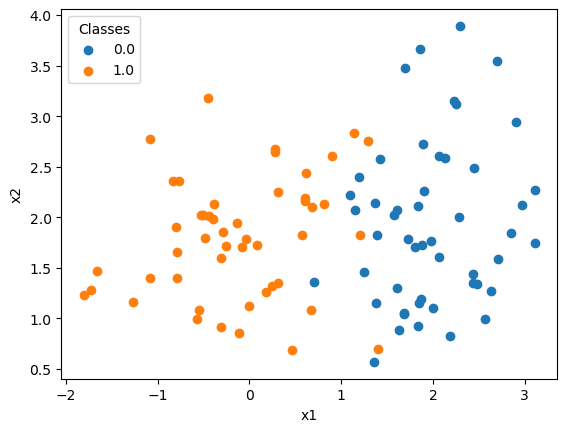

In [135]:
classes = data4['class'].unique()

for c in classes:
    class_data = data4[data4['class'] == c]
    plt.scatter(class_data['X'], class_data['Y'], label= str(c))

plt.legend(title='Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [136]:
# Separating features & target and splitting them as training & testing dataset
X = data4[['X','Y']].values
y = data4['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [137]:
k=[]
train_score=[]
cv_score=[]

# Calculating train and cv score on different K values
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn4 = KNeighborsClassifier(i) #initialising the model
    knn4.fit(x_train,y_train) # training the model
    #print("K value  : " , i, " train score : ", knn2.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn2, x_train, y_train, cv=10))) #predicting using the model
    k.append(i)
    train_score.append(knn4.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn4, x_train, y_train, cv=10)))
    
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

In [138]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.942857
1,2,0.956522,0.942857
2,3,0.971014,0.971429
3,4,0.971014,0.971429
4,5,0.971014,0.971429
5,6,0.971014,0.957143
6,7,0.971014,0.957143
7,8,0.956522,0.957143
8,9,0.956522,0.957143
9,10,0.942029,0.957143


k = 3,4,5 are the best values of k - hyperparameter tuning

### From the below plots, we are comparing how the decision boundary changes as the k value increments¶

In [139]:
# Calculating train and cv score on different K values
k=[]
test_score=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    test_score.append(knn.score(x_test,y_test))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Test_Score':test_score}
score = pd.DataFrame(score)

In [140]:
score

,K,Test_Score
0,1,0.900000
1,2,0.933333
2,3,0.866667
3,4,0.933333
4,5,0.900000
5,6,0.933333
6,7,0.933333
7,8,0.933333
8,9,0.933333
9,10,0.933333


From the Test Score table, it is evident that we have selected the best value of K correctly since it gives the highest test score

Optimum Model Accuracy = 93.3% ; Best K value = 4

### Let's try predicting class with random sample input

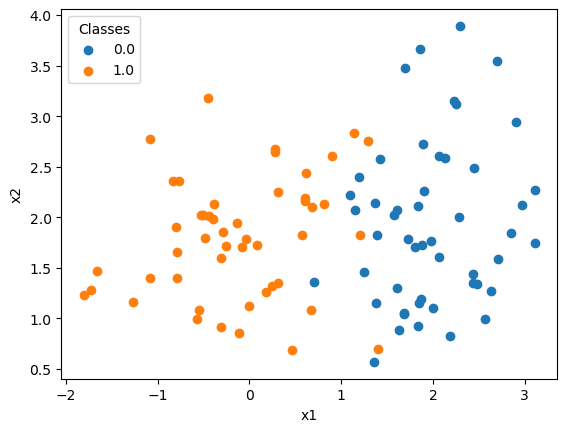

In [141]:
classes = data4['class'].unique()

for c in classes:
    class_data = data4[data4['class'] == c]
    plt.scatter(class_data['X'], class_data['Y'], label= str(c))

plt.legend(title='Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [142]:
knn = KNeighborsClassifier(4)
knn.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X1,X2(0.5,1):', knn.predict(scaler.transform([[0.5,1]])))

PREDICTING KNN SCORE OF X1,X2(0.5,1): [1.]


We could compare our result with the plot above

### Comparing CV scores with n fold cross validation where n=5,10

In [143]:
# Calculating train and cv score on different K values
k=[]
train_score=[]
cv_score_5=[]
cv_score_10=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    train_score.append(knn.score(x_train,y_train))
    cv_score_5.append(np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
    cv_score_10.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Train_Score':train_score,'CV_Score (n=5)':cv_score_5,'CV_Score (n=10)':cv_score_10}
score = pd.DataFrame(score)

In [144]:
score

,K,Train_Score,CV_Score (n=5),CV_Score (n=10)
0,1,1.000000,0.941758,0.942857
1,2,0.956522,0.941758,0.942857
2,3,0.971014,0.970330,0.971429
3,4,0.971014,0.970330,0.971429
4,5,0.971014,0.970330,0.971429
5,6,0.971014,0.956044,0.957143
6,7,0.971014,0.956044,0.957143
7,8,0.956522,0.956044,0.957143
8,9,0.956522,0.956044,0.957143
9,10,0.942029,0.956044,0.957143


# Visualising the logistic regression decision boundary for all data above

### Comparing Logistic Regression Model & KNN Algorithm for U shaped Dataset

In [52]:
logistic(data1,1),knn_comparison(data1,5)

### Comparing Logistic Regression Model & KNN Algorithm for Concentric Circles Dataset

In [53]:
logistic(data2,1),knn_comparison(data2,3)

### Comparing Logistic Regression Model & KNN Algorithm for XOR Dataset

In [54]:
logistic(data3,1),knn_comparison(data3,3)

### Comparing Logistic Regression Model & KNN Algorithm for Linearly Separable Dataset

In [55]:
logistic(data4,1),knn_comparison(data4,4)

## Conclusion

It is Clearly evident that KNN Algorithm is more accurate than Logistic Regression, both visually and numerically